In [71]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [72]:
covid_cases_by_day = pd.read_csv('cases-by-day.csv')
cases_by_boro = pd.read_csv("by-boro.csv")
rent_prices = pd.read_csv('medianAskingRent_All.csv')
rent_prices.rename(columns={"Attribute" : "Date", "Value" : "Median_Rent"}, inplace=True)
census_data = pd.read_csv('nyc_census_data.csv')

In [73]:
census_data.head()

,Orig Order,GeoType,Borough,GeoID,BCT2020,Name,CD Type,NTA Type,Pop_10,Pop_10P,...,ONH_Ch,ONH_PCh,NH2pl_Ch,NH2pl_PCh,HUnits_Ch,HUnits_PCh,OcHU_Ch,OcHU_PCh,VacHU_Ch,VacHU_PCh
0,1,NYC,New York City,0,NaN,NYC,NaN,NaN,"8,175,133",100.0,...,"65,569",84.0,"151,283",101.8,"247,573",7.3,"260,664",8.4,"-13,091",-5.0
1,2,Boro,Manhattan,1,NaN,Manhattan,NaN,NaN,"1,585,873",100.0,...,"8,230",104.4,"33,032",110.3,"66,836",7.9,"53,936",7.1,"12,900",15.5
2,3,Boro,Bronx,2,NaN,Bronx,NaN,NaN,"1,385,108",100.0,...,"7,372",59.0,"12,408",77.7,"35,134",6.9,"39,001",8.1,"-3,867",-13.6
3,4,Boro,Brooklyn,3,NaN,Brooklyn,NaN,NaN,"2,504,700",100.0,...,"21,675",136.3,"73,160",182.9,"77,361",7.7,"92,948",10.1,"-15,587",-18.7
4,5,Boro,Queens,4,NaN,Queens,NaN,NaN,"2,230,722",100.0,...,"26,252",65.8,"28,005",49.9,"61,206",7.3,"67,093",8.6,"-5,887",-10.7


C:\Users\jackc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_of_interest', ylabel='CASE_COUNT_7DAY_AVG'>

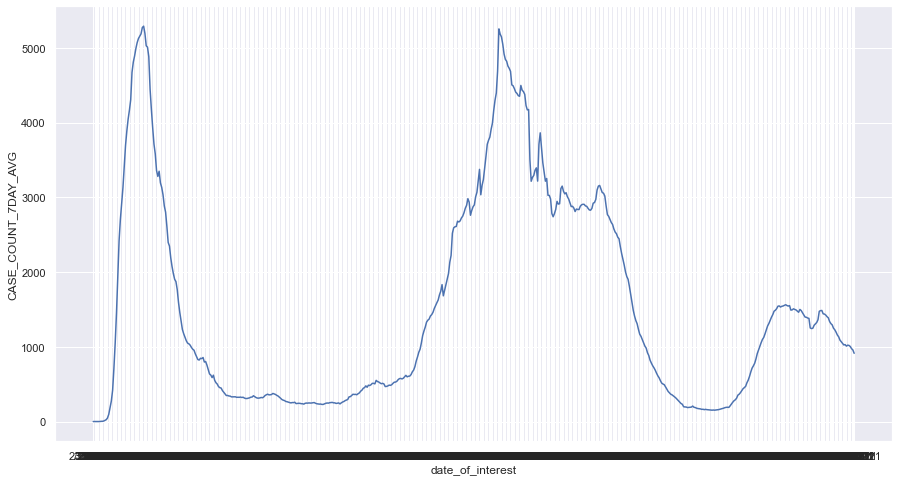

In [74]:
##Graph to look at all covid cases in NYC since the start of Covid

dates_to_plot =covid_cases_by_day['date_of_interest']
covid_cases_to_plot = covid_cases_by_day['CASE_COUNT_7DAY_AVG']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(dates_to_plot, covid_cases_to_plot)

([<matplotlib.axis.XTick at 0x27f3aa87100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

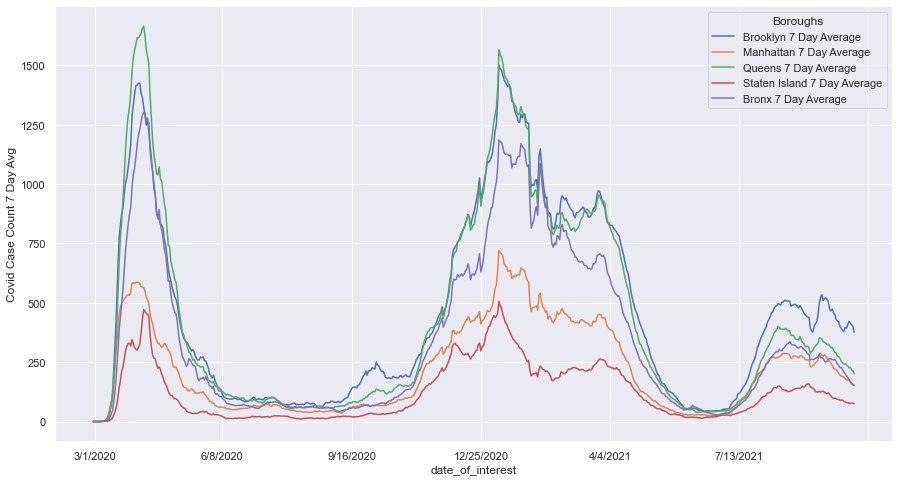

In [75]:
## Separate Covid data out by Borough and graph on a line chart 

#Pullo out the data and rename columns for graph 
boro_to_plot = covid_cases_by_day[["date_of_interest","BK_CASE_COUNT_7DAY_AVG","MN_CASE_COUNT_7DAY_AVG", 'QN_CASE_COUNT_7DAY_AVG',
'SI_CASE_COUNT_7DAY_AVG', 'BX_ALL_CASE_COUNT_7DAY_AVG' ]]
boro_to_plot = boro_to_plot.rename(columns= {
    "BK_CASE_COUNT_7DAY_AVG": "Brooklyn 7 Day Average",
    "MN_CASE_COUNT_7DAY_AVG": "Manhattan 7 Day Average",
    "SI_CASE_COUNT_7DAY_AVG": "Staten Island 7 Day Average",
    "QN_CASE_COUNT_7DAY_AVG": "Queens 7 Day Average",
    "BX_ALL_CASE_COUNT_7DAY_AVG": "Bronx 7 Day Average"
})

#Melt the dataframe -- this is making the column headers of the different boroughs row values instead
boro_to_plot = boro_to_plot.melt('date_of_interest', var_name='Boroughs' , value_name='Covid Case Count 7 Day Avg')

##Graph the above values
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.lineplot(x='date_of_interest', y='Covid Case Count 7 Day Avg', hue = 'Boroughs' , data = boro_to_plot)
x = [1,100,200,300,400,500,600]
plt.xticks(x)


([<matplotlib.axis.XTick at 0x27f3aed1bb0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

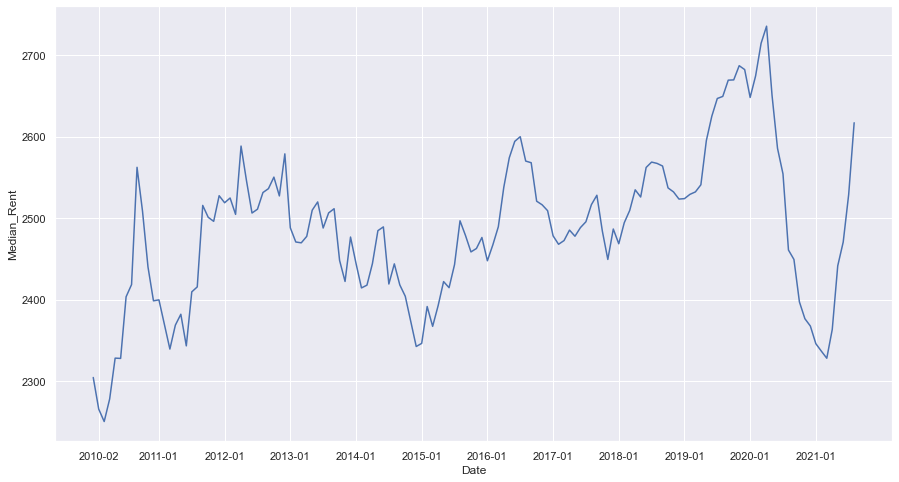

In [76]:
## Look at median rent prices in NYC from 2010 through current 

rent_prices.head()
sns.set(rc = {'figure.figsize':(15,8)})
rent_prices = rent_prices.groupby(['Date']).agg(np.average)
g = sns.lineplot(x='Date', y='Median_Rent' , data = rent_prices)
x = [1,12,24,36,48,60,72,84,96,108,120,132]
plt.xticks(x)


([<matplotlib.axis.XTick at 0x27f3ab8cc40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

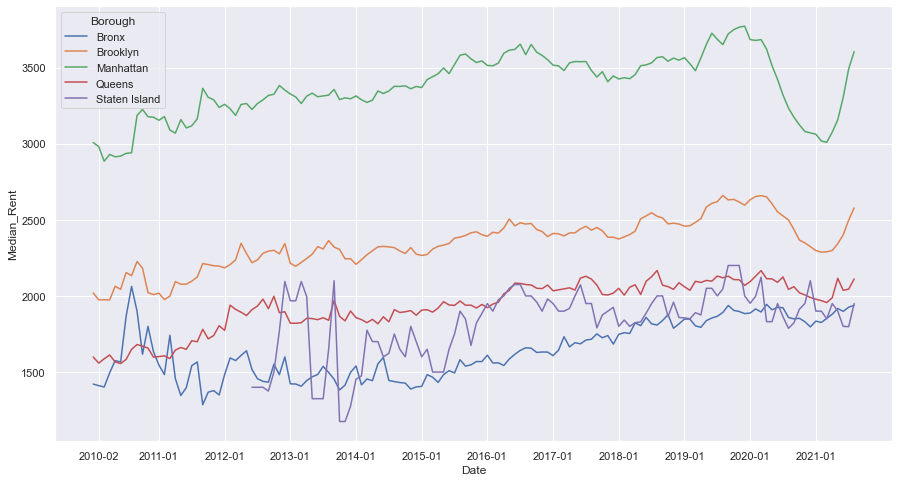

In [77]:
##Graph median rent by borough
rent_prices = pd.read_csv('medianAskingRent_All.csv')
rent_prices.rename(columns={"Attribute" : "Date", "Value" : "Median_Rent"}, inplace=True)
median_rents_by_boro = rent_prices.reset_index().groupby(['Date', 'Borough']).agg(np.average)
g = sns.lineplot(x='Date', y='Median_Rent', hue = 'Borough' , data = median_rents_by_boro)
x = [1,12,24,36,48,60,72,84,96,108,120,132]
plt.xticks(x)
# median_rents_by_boro.head()

In [78]:
## Create categories based on different timeframes of the Covid outbreak 

rent_prices.head()
rents_over_time = rent_prices[(rent_prices['Date'] == '2020-03') | (rent_prices['Date'] == '2020-01') | (rent_prices['Date'] == '2021-08') | (rent_prices['Date'] == '2021-01')]
rents_over_time.loc[rents_over_time['Date'] == '2020-01', 'covid_timeline'] = "Pre-Covid"
rents_over_time.loc[rents_over_time['Date'] == '2021-08', 'covid_timeline'] = "Current"
rents_over_time.loc[rents_over_time['Date'] == '2020-03', 'covid_timeline'] = "Covid Start"
rents_over_time.loc[rents_over_time['Date'] == '2021-01', 'covid_timeline'] = "Peak Covid"



C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\jackc\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
rents_over_time.head()


rents_over_time.loc[rents_over_time['covid_timeline'] == 'Pre-Covid', 'sort'] = 0
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Covid Start', 'sort'] = 1
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Peak Covid', 'sort'] = 2
rents_over_time.loc[rents_over_time['covid_timeline'] == 'Current', 'sort'] = 3
rents_over_time = rents_over_time.groupby(["Borough" , "covid_timeline", 'sort']).agg(np.average)
rents_over_time = rents_over_time.sort_values(by = ["sort"]).reset_index()



rents_over_time

,Borough,covid_timeline,sort,Median_Rent
0,Staten Island,Pre-Covid,0.0,1952.000000
1,Queens,Pre-Covid,0.0,2093.882353
2,Bronx,Pre-Covid,0.0,1887.625000
3,Manhattan,Pre-Covid,0.0,3683.432432
4,Brooklyn,Pre-Covid,0.0,2631.326087
5,Staten Island,Covid Start,1.0,2123.000000
6,Queens,Covid Start,1.0,2166.133333
7,Manhattan,Covid Start,1.0,3683.135135
8,Bronx,Covid Start,1.0,1894.500000
9,Brooklyn,Covid Start,1.0,2658.500000


<AxesSubplot:xlabel='Borough', ylabel='Median_Rent'>

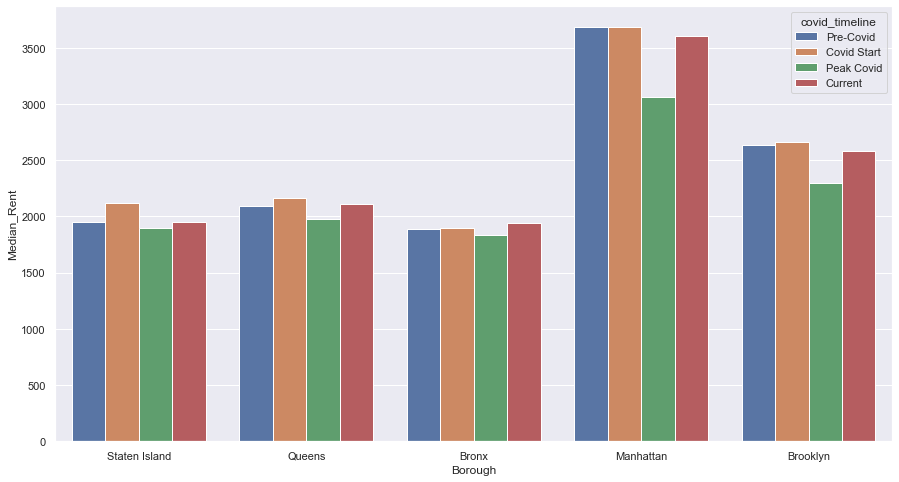

In [80]:
sns.barplot(
    x = 'Borough',
    y = "Median_Rent",
    hue='covid_timeline',
    data = rents_over_time
)

<AxesSubplot:xlabel='Borough', ylabel='Peak Covid Rents vs. Pre-Covid Rents (as %)'>

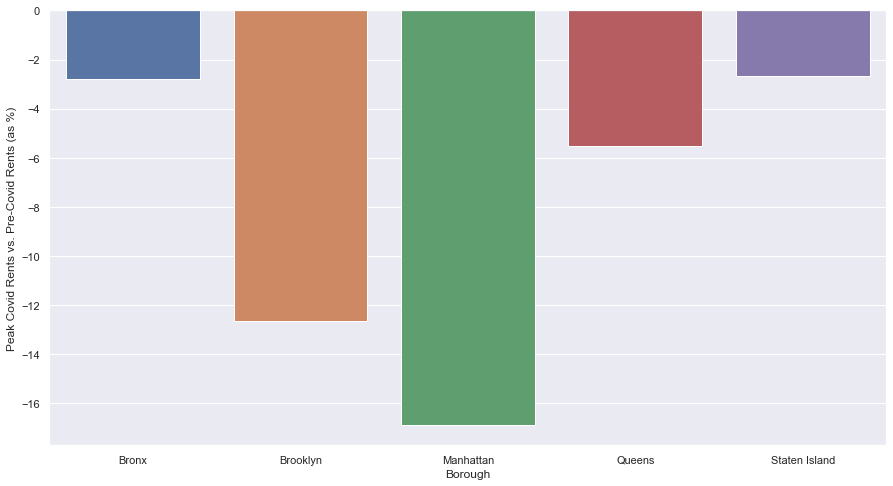

In [81]:
## Calculate the percent changes by borough of peak covid rates vs. pre covid rates 

changes = rents_over_time.pivot_table('Median_Rent', ['Borough'], 'covid_timeline').reset_index()
changes['Peak Covid Rents vs. Pre-Covid Rents (as %)'] = ((changes['Peak Covid']- changes['Pre-Covid'])/changes['Pre-Covid'])*100

sns.barplot(
    x = 'Borough',
    y = 'Peak Covid Rents vs. Pre-Covid Rents (as %)',
    data = changes
)

<AxesSubplot:xlabel='Borough', ylabel='Current Rents vs. Peak Covid Rents (as %)'>

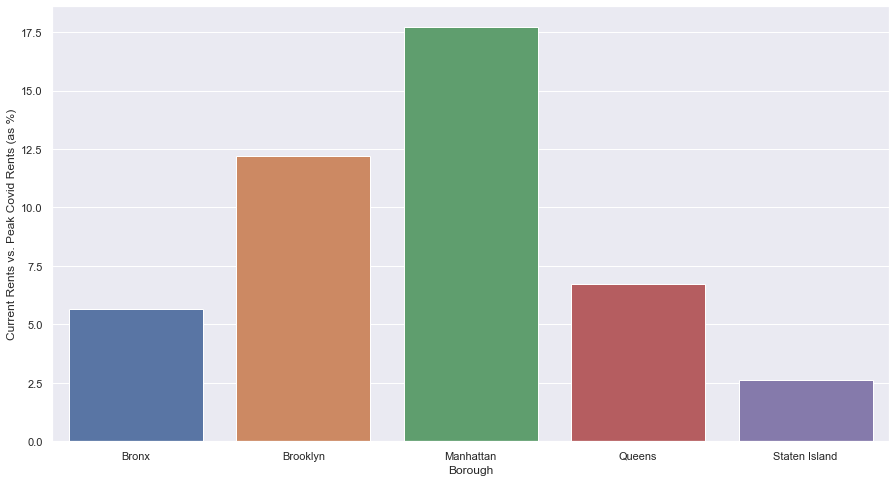

In [82]:
## Calculate the percent changes by borough of peak-covid rates vs current -- in order to see which is recovering well

changes2 = rents_over_time.pivot_table('Median_Rent', ['Borough'], 'covid_timeline').reset_index()
changes2['Current Rents vs. Peak Covid Rents (as %)'] = ((changes2['Current']- changes2['Peak Covid'])/changes2['Peak Covid'])*100

sns.barplot(
    x = 'Borough',
    y = 'Current Rents vs. Peak Covid Rents (as %)',
    data = changes2
)

<AxesSubplot:xlabel='Borough', ylabel='Current Rents vs. Pre-Covid Rents (as %)'>

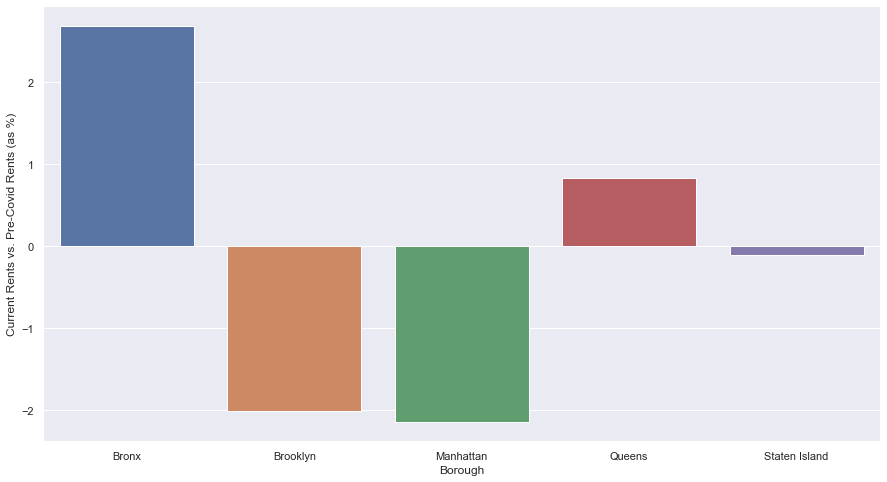

In [83]:
## Calculate the percent changes by borough of pre-covid rates vs current -- in order to see which is recovering well

changes3 = rents_over_time.pivot_table('Median_Rent', ['Borough'], 'covid_timeline').reset_index()
changes3['Current Rents vs. Pre-Covid Rents (as %)'] = ((changes3['Current']- changes3['Pre-Covid'])/changes3['Pre-Covid'])*100

sns.barplot(
    x = 'Borough',
    y = 'Current Rents vs. Pre-Covid Rents (as %)',
    data = changes3
)

In [84]:
## Find total changes in rents for all boroughs for slide 14 

rents_over_time_total = rents_over_time.pivot_table('Median_Rent', 'covid_timeline').reset_index()

## Find median rents for each time period 
covid_start = float(rents_over_time_total[rents_over_time_total['covid_timeline'] == "Covid Start"]['Median_Rent'])
current = float(rents_over_time_total[rents_over_time_total['covid_timeline'] == "Current"]['Median_Rent'])
peak_covid = float(rents_over_time_total[rents_over_time_total['covid_timeline'] == "Peak Covid"]['Median_Rent'])
pre_covid = float(rents_over_time_total[rents_over_time_total['covid_timeline'] == "Pre-Covid"]['Median_Rent'])


pct_change_at_peak = (peak_covid - pre_covid)/pre_covid
current_vs_pre = (current - pre_covid)/pre_covid
current_vs_pre



-0.005387574064762704

<AxesSubplot:>

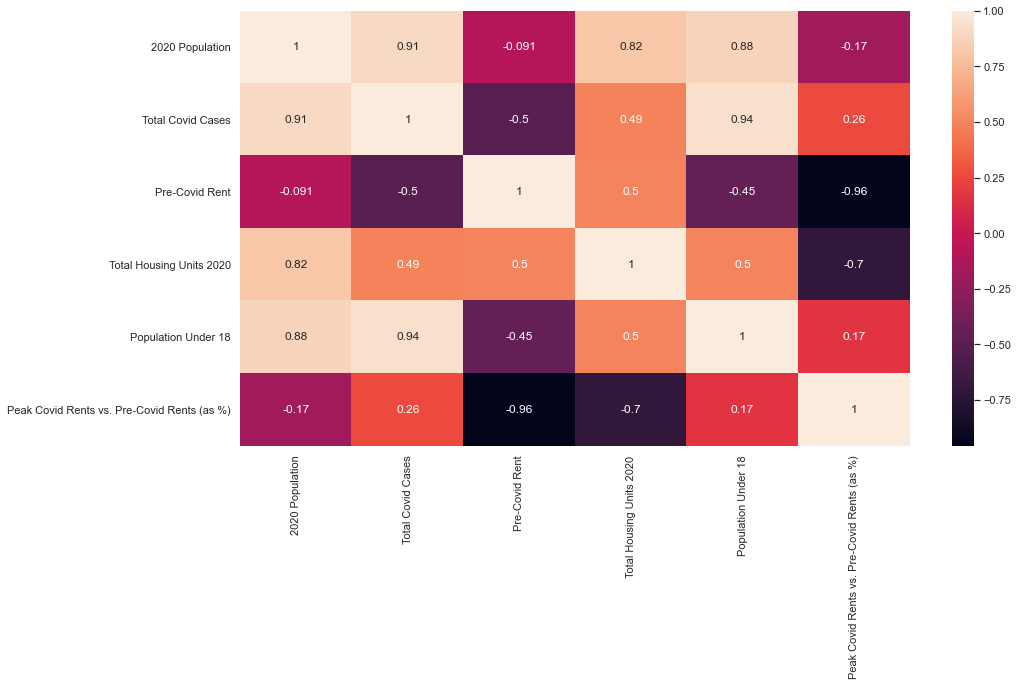

In [94]:
#Prepare the census data to merge other info into it
census_boros = census_data.loc[census_data['GeoType']== 'Boro']
census_analysis = census_boros[['Borough', 'Pop_20', 'HUnits_20' , 'VacHU_20',"PopU18_20"]]

#Merge changes in rents with census info by borough
census_analysis = census_analysis.merge(changes, left_on="Borough" , right_on="Borough")

#Merge covid cases into census dataset by borough 
cases_to_add = cases_by_boro[['BOROUGH_GROUP','CONFIRMED_CASE_COUNT']]
census_analysis = census_analysis.merge(cases_to_add, left_on="Borough" , right_on="BOROUGH_GROUP")

#Reformat columns to make graph variables more readable 
census_analysis.drop(columns= ['Covid Start' , "Current" , 'Peak Covid' ] , inplace=True)
census_analysis['Pop_20'] = census_analysis['Pop_20'].str.replace(',','').astype(int)
census_analysis['HUnits_20'] = census_analysis['HUnits_20'].str.replace(',','').astype(int)
census_analysis['VacHU_20'] = census_analysis['VacHU_20'].str.replace(',','').astype(int)
census_analysis['PopU18_20'] = census_analysis['PopU18_20'].str.replace(',','').astype(int)
census_analysis.rename(columns =  {  "Pop_20" : "2020 Population", 
                        "HUnits_20" : "Total Housing Units 2020" , 
                        "VacHU_20": "Vacant Housing Units 2020", 
                        "PopU18_20" : "Population Under 18", 
                        "Pre-Covid" : "Pre-Covid Rent", 
                        "CONFIRMED_CASE_COUNT" : "Total Covid Cases"}, inplace = True)
census_analysis.head()

#Graph into a correlation plot 
corr_matrix = census_analysis[['2020 Population' ,"Total Covid Cases", 'Pre-Covid Rent' ,'Total Housing Units 2020','Population Under 18' ,"Peak Covid Rents vs. Pre-Covid Rents (as %)"]].corr()
sns.heatmap(corr_matrix, annot = True)